
# Project: Investigate The Movie Dataset - TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project, I 've picked the TMDb data. For the data analysis, I've investigated some of the success factors for a movie. I tried to answer the question of what are some factors(variables) that play a role in  creating 'blockbuster' movie. In this analysis, the success of a movie is defined as the 'Revenue'(dependent variable) it generates. 'Budget', 'Popularity', 'Vote_Average', 'Vote_Count' are the independent variables that I've investigated against the 'Revenue'. 

In [2]:
# Import the packages that I'll need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# Load the data and make an initial inspection.
df=pd.read_csv('tmdb-movies.csv')
#   types of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The shape of this data set is 10866 rows & 21 columns. There are columns have high percentage of null data. 

In [4]:
#look at the data 
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
#instances of missing data.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As can be seen from the analysis, Homepage, tagline, keywords, and production_companies have big chunks of missing data. I'll be handling that missing data in the Data Cleaning section.

In [6]:
#Let's check some statistical values of the data. 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


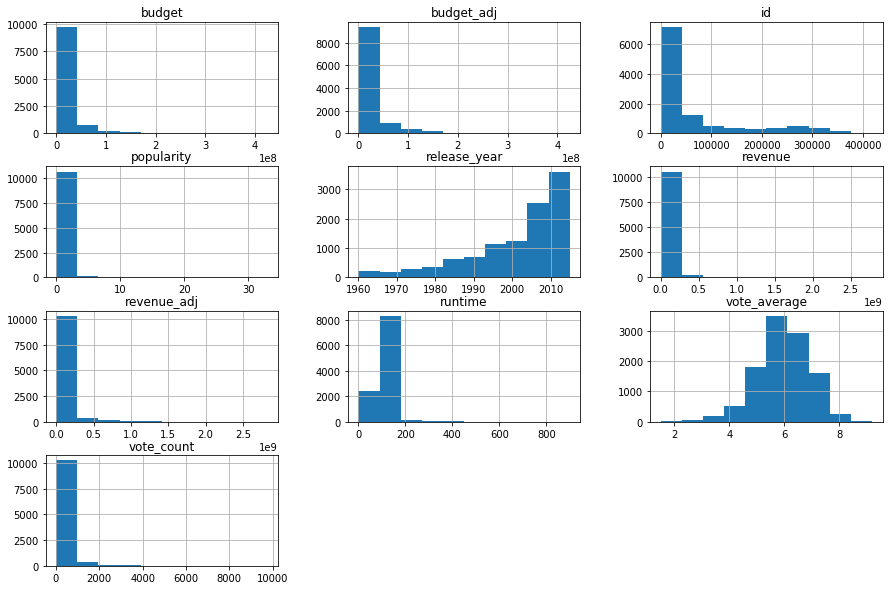

In [7]:
#Let's also see the variable histograms to visualize the analysis above. 
df.hist(figsize=(15,10));

We can see the data distribution of variables clearly from histograms. For example, 'vote_average' has a normal distibution of data, where as 'release year' is left skewed. The rest of the variables are right skewed such as 'revenue' and 'budget'.  



### Data Cleaning

In [8]:
# Homepage column has 7,930 null values out of 10866 rows. Similarly, tagline, keywords, production_companies columns 
#have over 1,000 null rows for each(at least 10%of data is missing for these columns).
#Therefore, it makes sense to drop those columns entirely.
df.drop(['homepage', 'tagline','keywords', 'production_companies'], axis=1, inplace=True)

In [9]:
#confirm the column drops
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [10]:
#drop rows with missing values from the dataset
df.dropna(inplace=True)

In [11]:
#confirm the change
df.isnull().sum().any()

False

In [12]:
#check duplicates in the dataset
print(df.duplicated().sum())

1


In [13]:
#drop duplicates in the dataset
df.drop_duplicates(inplace=True)

In [14]:
#confirm there are no duplicates in the dataset. 
print(df.duplicated().sum().any())

False


In [15]:
#change 'release_date' column's data type from 'object' to 'date'.
df['release_date']=pd.to_datetime(df['release_date'])

In [16]:
#confirm the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10724 entries, 0 to 10865
Data columns (total 17 columns):
id                10724 non-null int64
imdb_id           10724 non-null object
popularity        10724 non-null float64
budget            10724 non-null int64
revenue           10724 non-null int64
original_title    10724 non-null object
cast              10724 non-null object
director          10724 non-null object
overview          10724 non-null object
runtime           10724 non-null int64
genres            10724 non-null object
release_date      10724 non-null datetime64[ns]
vote_count        10724 non-null int64
vote_average      10724 non-null float64
release_year      10724 non-null int64
budget_adj        10724 non-null float64
revenue_adj       10724 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(6)
memory usage: 1.5+ MB


In [17]:
#create a new 'release_year' column
df['release_year']=df['release_date'].dt.year

In [18]:
#confirm 'release_year' column
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Is there a relationship between the spending for the movie making and the revenue the movie generates?

Text(0,0.5,'Revenue')

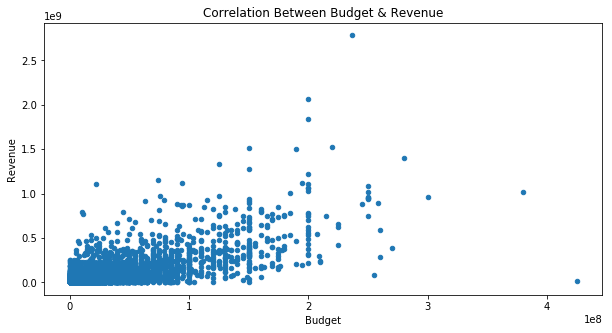

In [19]:
# Look at the correlation between budget and revenue columns
df.plot(x='budget', y='revenue', kind='scatter', figsize=(10,5));
plt.title('Correlation Between Budget & Revenue');
plt.xlabel('Budget')
plt.ylabel('Revenue')


According to the correlation analysis between budget and revenue of movies, we clearly see a positive correlation between the two factors. 

In [20]:
#Looks like there is a positive correlation between movie revenue and budget. 
#So, I created masks for expensive and cheap productions to dig deeper.
mean=df['budget'].mean()
df_expensive=df.query('budget>={}'.format(mean))
df_cheap=df.query('budget<{}'.format(mean))
mean


14813309.051846325

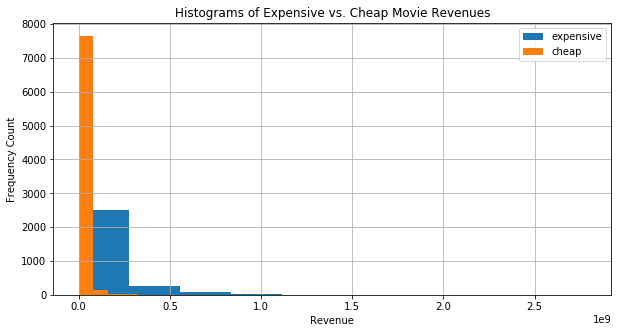

In [22]:
#Let's compare the expensive and cheap productions and their revenue generation. 
df_expensive['revenue'].hist(label='expensive', figsize=(10,5));
df_cheap['revenue'].hist(label='cheap',figsize=(10,5));
plt.legend();
plt.title('Histograms of Expensive vs. Cheap Movie Revenues');
plt.xlabel('Revenue');
plt.ylabel('Frequency Count');

Although more movies are in the cheap movies category (~7,500 movies) vs expensive movies (~3,000 movies), we can clearly see the right skeweness of the expensive productions. In other words, expensive productions histogram is skewed right, showing that higher percentage of expensive movies are associated with higher revenues which confirms our correlation analysis between revenue and budget of a film. 

## Can user ratings predict the revenue success of a movie?

Text(0,0.5,'Revenue')

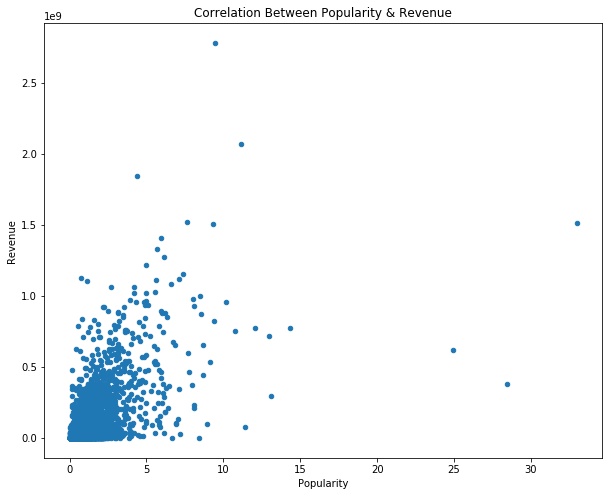

In [27]:
# Look at the correlation between popularity and the movie revenue
df.plot(x='popularity', y='revenue', kind='scatter', figsize=(10,8));
plt.title('Correlation Between Popularity & Revenue');
plt.xlabel('Popularity')
plt.ylabel('Revenue')


Text(0,0.5,'Revenue')

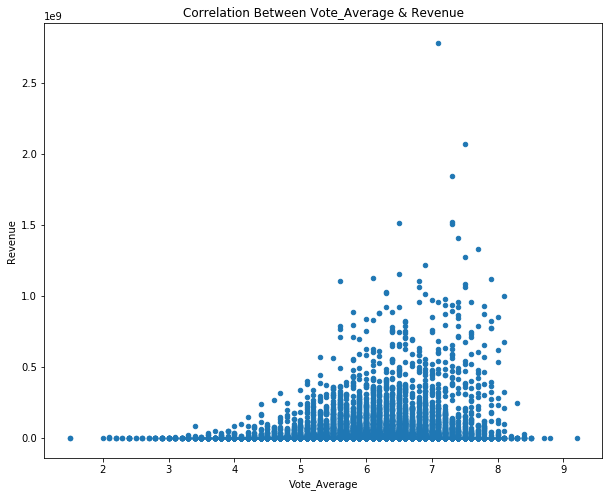

In [30]:
# Look at the correlation between vote_avg and the movie revenue
df.plot(x='vote_average', y='revenue', kind='scatter', figsize=(10,8));
plt.title('Correlation Between Vote_Average & Revenue');
plt.xlabel('Vote_Average')
plt.ylabel('Revenue')


Text(0,0.5,'Revenue')

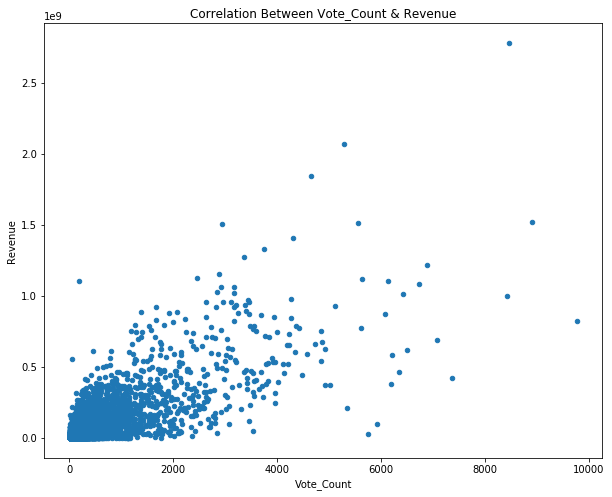

In [31]:
# Look at the correlation between vote_count and the movie revenue
df.plot(x='vote_count', y='revenue', kind='scatter', figsize=(10,8));
plt.title('Correlation Between Vote_Count & Revenue');
plt.xlabel('Vote_Count')
plt.ylabel('Revenue')


 According to the scatter plots, we can see the positive correlation between our dependent variable and the independent variables. In other words, as the user ratings (popularity, vote_count, vote_average) increases, there is a higher chance to see higher revenue movie. But based on the scatter plots, it is hard to say that there is strong correlation, but rather moderate to low correlation among the variables. Also, would be nice to look into more to the 'vote_average'data,  because it looks like,a no-correlation scatter plot and positive-correlation scatter plot have merged. 

In [24]:
#Looks like there is a positive correlation between movie revenue and vote_average. 
#However, scatter plot looks as if two scatter plots overlapped. (a horizontal line -no correlation and positive correlation line) 
#So, I created masks for 'high' and 'low' 'vote_average' variable to dig deeper.
median=df['vote_average'].median()
df_high=df.query('vote_average>={}'.format(median))
df_low=df.query('vote_average<{}'.format(median))
median

6.0

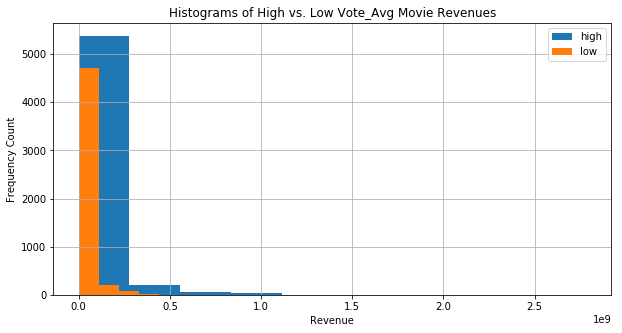

In [25]:
#Let's compare the expensive and cheap productions and their revenue generation. 
df_high['revenue'].hist(label='high', figsize=(10,5));
df_low['revenue'].hist(label='low',figsize=(10,5));
plt.legend();
plt.title('Histograms of High vs. Low Vote_Avg Movie Revenues');
plt.xlabel('Revenue');
plt.ylabel('Frequency Count');

Looks like the number of movies are equally divided into to low vs. high vote_average groups. From the analysis, we can clearly see the right skeweness of the high 'vote_average' group. In other words, high 'vote_average' group's histogram is skewed right, showing that higher percentage of highly voted movies are associated with higher revenues which confirms my suspicion of  one group being more strongly correlated(high vote-avg) with the revenue than the other group (low-vote-avg). 

<a id='conclusions'></a>
## Conclusions

This analysis looked at the relationship between 'revenue' of a movie (dependent variable) and the 'budget', 'popularity', 'vote_count' and 'vote_average' of a movie (independent variables). According to the exploratory data analysis, I discovered that these factors are positively correlated with the 'revenue' (success) of a movie. Correlations looked like from moderately positive to low positive correlation.   

Limitations: There are limitations to my data analysis due to the available movie data.  Though some of the columns are dropped during data cleaning phase due to these columns missing data (over 10% of missing data) such as 'Home Page', 'Tagline' columns, the zero values or outliers in the variables e.g. budget, revenue in the dataset are not addressed during data cleaning. In the original dataset, there would be cases that the data value has been entered as zero when there is a missing data. Secondly, the results are limited due to its sample size (TMDb database) and can't be attributed to the whole movie population.     



In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0